In [1]:
import pandas as pd

In [18]:
model = train_supervised(input=f'{main_path}/{samples[2]}/{fasttext_folder}/train_0.csv', 
                            label='__class__', 
                            lr = 1,
                            dim = 200,
                            ws = 10,
                            epoch = 10,
                            loss = 'ova')

In [19]:
df_test = pd.read_csv(f'{main_path}/{samples[2]}/{fasttext_folder}/test_0.csv', names=['text'])
df_test['id_typ_dokument'] = df_test['text'].apply(lambda x: x.split()[0])

In [20]:
preds = []
for val in df_test['text']:
    preds.append(model.predict(val)[0][0])

In [21]:
f1_score(df_test['id_typ_dokument'].tolist(), preds, average='macro')

0.9222949565825957

In [22]:
accuracy_score(df_test['id_typ_dokument'].tolist(), preds)

0.9360573923892701

In [23]:
labels = set(df_test['id_typ_dokument'].tolist())
labels = sorted([int(label.replace(params['label'], '')) for label in labels], reverse=False)
labels_str = [f"{params['label']}{label}" for label in labels]

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [67]:
def drow_cmap(y_true, y_pred, labels, perc=True):
    labels_str = [f"{params['label']}{label}" for label in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels_str)
    if perc:
        cm = [[round(i/sum(arr), 4) for i in arr] for arr in cm]
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(20,13))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='.2%' if perc else 'd') # font size

    plt.show()

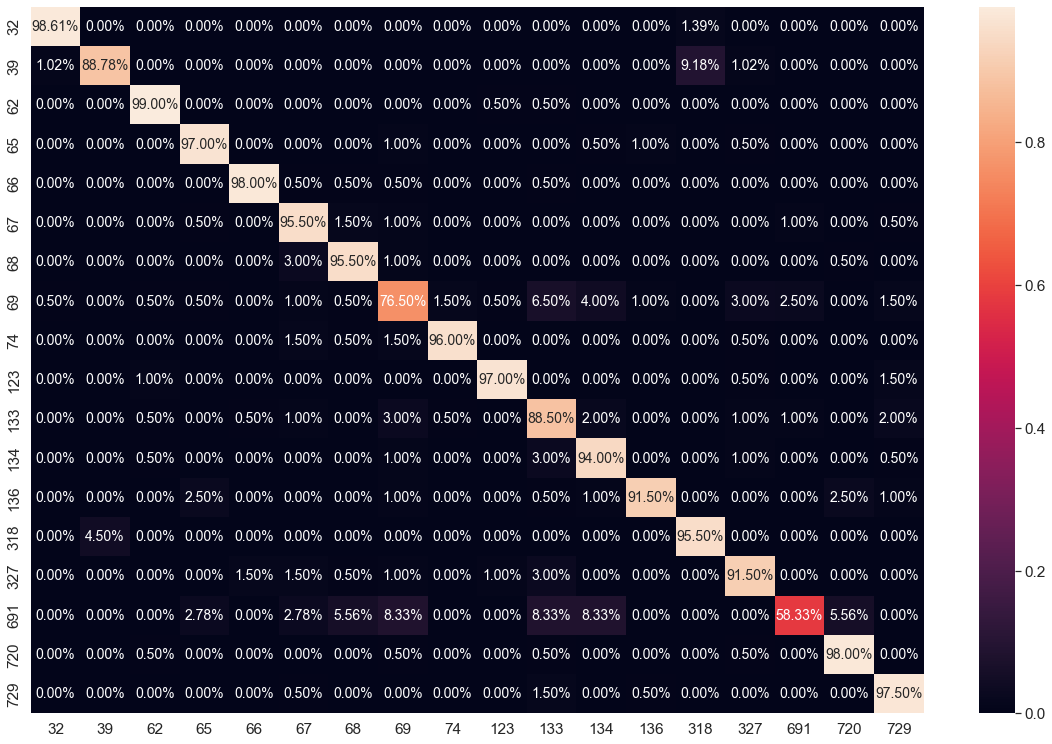

In [68]:
drow_cmap(df_test['id_typ_dokument'].tolist(), preds, labels)